### Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB    
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

C:\Users\KRISHNA\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sms = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['labels', 'messages'])
sms.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA (Exploratory Data Analysis)

In [3]:
print(f'{sms.info()} \n\nShape of the Data: {sms.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None 

Shape of the Data: (5572, 2)


Number of SPAM and HAM:
ham     4825
spam     747
Name: labels, dtype: int64



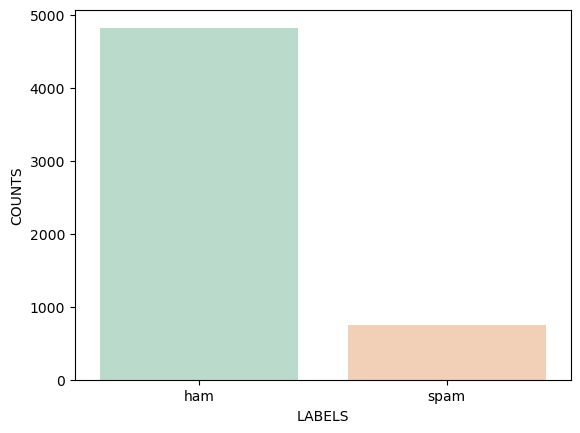

In [4]:
print(f"Number of SPAM and HAM:\n{sms['labels'].value_counts()}\n")

sns.countplot(x = sms['labels'], palette = 'Pastel2', saturation = 0.72)
plt.xlabel('LABELS')
plt.ylabel('COUNTS')
plt.show();

In [5]:
sms.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
top_messages = sms.groupby('messages')['labels'].agg([len, np.max]).sort_values(by = 'len',ascending = False)
top_messages.head(12)

,len,max
messages,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Ok,4,ham
Okie,4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st ""Ur Lovely Friendship""... good morning dear",4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!,4,spam


### Cleaning and Pre-Processing

In [7]:
#Data Cleaning and PreProcessing

ps = PorterStemmer()

corpus = []

for i in range(0, len(sms)):
    review = re.sub('[^a-zA-Z]', ' ', sms['messages'][i])
    review = review.lower()
    review = review.split()   
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
x = corpus
x

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [8]:
sms.loc[sms.labels == 'ham', 'labels'] = 0
sms.loc[sms.labels == 'spam','labels'] = 1


y = sms['labels']
y = y.astype(int)

y.shape

(5572,)

In [9]:
# Train Test Split

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [10]:
# Creating Bag of Words for Xtrain & Xtest

#cv = CountVectorizer(max_features=5000)

tv = TfidfVectorizer(max_features = 5000)  

x_train = tv.fit_transform(xtrain)
x_test = tv.transform(xtest)

In [11]:
# Shape & ValueCounts of Train & Test datas

print(f'SHAPE OF X -TRAIN & TEST\nX Train: {x_train.shape}\nX Test: {x_test.shape}\n')

print(f'NO OF [HAM-0, SPAM-1] IN Y-TRAIN & TEST\nY Train:\n{ytrain.value_counts()}\nY Test:\n{ytest.value_counts()}')

SHAPE OF X -TRAIN & TEST
X Train: (4457, 5000)
X Test: (1115, 5000)

NO OF [HAM-0, SPAM-1] IN Y-TRAIN & TEST
Y Train:
0    3870
1     587
Name: labels, dtype: int64
Y Test:
0    955
1    160
Name: labels, dtype: int64


### Model Training

In [12]:
#Training the Model

spam_detect_model = MultinomialNB()

spam_detect_model.fit(x_train, ytrain) 
ypred = spam_detect_model.predict(x_test)
train = spam_detect_model.score(x_train, ytrain)
test = spam_detect_model.score(x_test, ytest)


print(f'TRAINING ACCURACY: {train}\n\nTESTING ACCURACY: {test}\n\n{classification_report(ytest, ypred)}')

TRAINING ACCURACY: 0.9798070450975993

TESTING ACCURACY: 0.9730941704035875

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       955
           1       1.00      0.81      0.90       160

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### Confusion Matrix

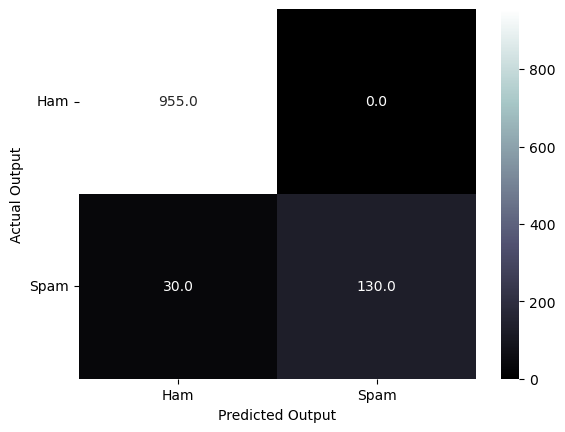

In [13]:
confusion_m =confusion_matrix(ytest, ypred)


sns.heatmap(confusion_m, cmap = 'bone', annot = True, fmt = '.1f',
            xticklabels = ['Ham', 'Spam'], yticklabels = ['Ham', 'Spam'])
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.yticks(rotation = 0)
plt.show();

### Model Predection

In [15]:
# Input Text
input_sms = ["I don't want to talk about this stuff anymore and i'm gonna be home soon tonight, k."]      


# Preprocess I/P Text
input_cv = tv.transform(input_sms)


# Make Predection
prediction = spam_detect_model.predict(input_cv)


# Interpret Prediction
if prediction[0] == 0:
    result = "HAM Message"
else:
    result ="SPAM Message"

    
# Result
print(f'Predection: {result}')

Predection: HAM Message


In [16]:
# Input Text
input_sms = ["Congratulations! You’ve won a $500 Amazon gift card. Claim it here Link"]


# Preprocess I/P Text
input_cv = tv.transform(input_sms)


# Make Prediction
prediction = spam_detect_model.predict(input_cv)


# Interpret Prediction
if prediction[0] == 0:
    result = "HAM Message"
else:
    result ="SPAM Message"
    
    
# Result
print(f'Predection: {result}')

Predection: SPAM Message


### Result analysis

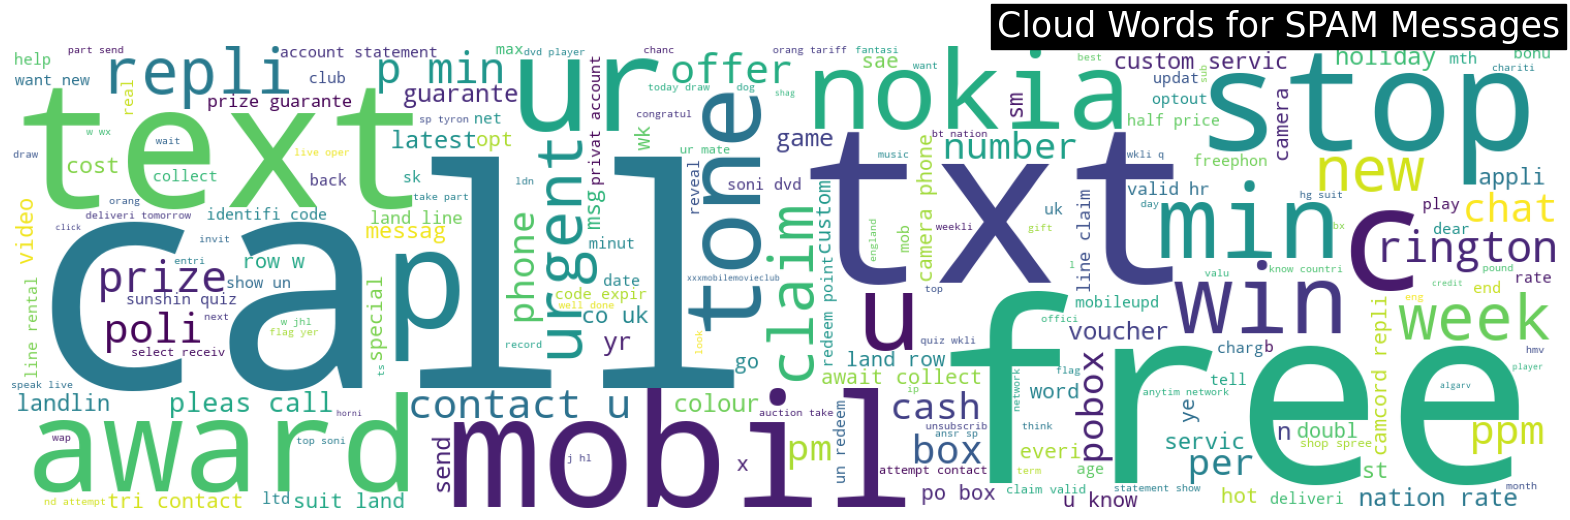

In [17]:
# You have already trained your model and have predictions in 'ypred'
# 'Xtest' contains the original text of the test messages, 
# Combine the predicted labels (0 for ham, 1 for spam) with the test messages


sms_results = pd.DataFrame({'Messages' : xtest, 'Labels' : ypred})

# Filter out the SPAM Message
spam_msg = sms_results[sms_results['Labels'] == 1]['Messages']

# Joining the messages into a Single Text
spam_txt = ' '.join(spam_msg)

# Generate word cloud for Spam
word_cloud = WordCloud(width = 1500, height = 450, background_color = 'white').generate(spam_txt)

# plot the Cloud Words
plt.figure(figsize = (20,15))
plt.imshow(word_cloud)
plt.axis('off')

plt.title('Cloud Words for SPAM Messages',
          fontsize = 25, 
          backgroundcolor = 'black',
          color = 'white', loc ='right')

print(f'\n')
plt.show();
